### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 
## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения
##### Студент:  Маслова Анастасия
##### Группа:   НКНбд-01-21
## Москва 2024
***
### Вариант №14

1. Набор данных: diamonds 

2. Независимые признаки: depth, table 

3. Метка класса: color 

4. Показатель бинарной классификации: 

𝐹𝑁 (False Negatives) – число точек в положительном классе, ошибочно спрогнозированных в отрицательный класс 

5. Параметры нейронных сетей: 

Кол-во скрытых слоев: 3 

Кол-во нейронов в слое: 128 

Оптимизаторы: Adadelta, AdamW, RMSprop 

Функция активации в скрытых слоях: leaky_relu 

 
Решение:


1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import scipy as sp
from sklearn.model_selection import train_test_split

In [2]:
ds = tfds.load("diamonds", split="train")
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [3]:
df['carat'] = df['features/carat']
df.drop(columns=['features/carat'],inplace=True)
df.drop(columns=['features/clarity'],inplace=True)
df['color'] = df['features/color']
df.drop(columns=['features/color'],inplace=True)
df.drop(columns=['features/cut'],inplace=True)
df['depth'] = df['features/depth']
df.drop(columns=['features/depth'],inplace=True)
df['table'] = df['features/table']
df.drop(columns=['features/table'],inplace=True)
df['x'] = df['features/x']
df.drop(columns=['features/x'],inplace=True)
df['y'] = df['features/y']
df.drop(columns=['features/y'],inplace=True)
df['z'] = df['features/z']
df.drop(columns=['features/z'],inplace=True)

df.head()

,price,carat,color,depth,table,x,y,z
0,6546.0,1.26,4,60.599998,60.0,6.97,7.00,4.23
1,3030.0,0.80,4,62.099998,54.0,5.96,5.99,3.71
2,1915.0,0.56,2,61.700001,54.0,5.28,5.32,3.27
3,6936.0,1.51,6,64.000000,58.0,7.24,7.27,4.64
4,646.0,0.33,5,62.200001,54.0,4.43,4.45,2.76


In [4]:
depth = df["depth"]
table = df["table"]
color = df["color"]
df.color.shape

(53940,)

2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

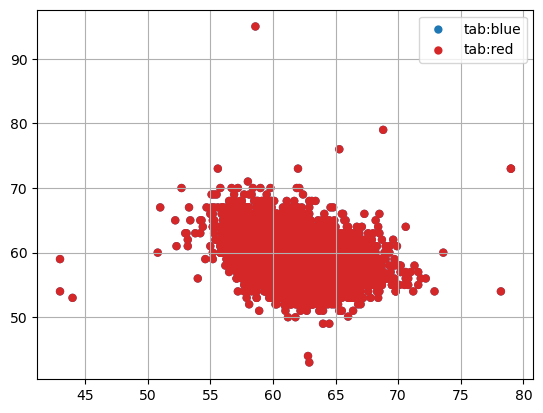

In [5]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:red']:
    x = df.depth
    y = df.table
    scale = df.table.shape[0]
    ax.scatter(x, y, c=color, label=color, alpha=1, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

C:\Users\anast\AppData\Local\Temp\ipykernel_16608\4166167493.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(depth, table, c = color, cmap = plt.cm.hsv)


Text(0.5, 1.0, 'Diamonds Dataset')

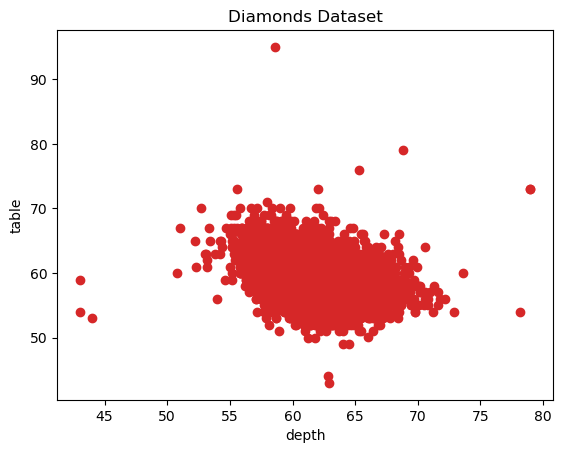

In [6]:
plt.scatter(depth, table, c = color, cmap = plt.cm.hsv)
plt.xlabel('depth')
plt.ylabel('table')
plt.title('Diamonds Dataset')

3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

In [7]:
df['color'].unique()

array([4, 2, 6, 5, 3, 1, 0], dtype=int64)

In [8]:
df['color'].value_counts()

color
3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: count, dtype: int64

In [9]:
print((df['color'].apply(lambda x: 1 if x > 2 else 0).value_counts()))
df.loc[:, 'color'] = df['color'].apply(lambda x: 1 if x > 2 else 0)


color
1    27826
0    26114
Name: count, dtype: int64


In [10]:
df['depth'].head()

0    60.599998
1    62.099998
2    61.700001
3    64.000000
4    62.200001
Name: depth, dtype: float32

4. Разбейте набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки. Постройте нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.

Показатель бинарной классификации: 

𝐹𝑁 (False Negatives) – число точек в положительном классе, ошибочно спрогнозированных в отрицательный класс 

Параметры нейронных сетей: 

Кол-во скрытых слоев: 3 

Кол-во нейронов в слое: 128 

Оптимизаторы: Adadelta, AdamW, RMSprop 

Функция активации в скрытых слоях: leaky_relu 


In [11]:
def fn(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['depth','table']],df['color'], test_size=0.3, random_state=42)

X_train.shape

(37758, 2)

In [13]:
x_t = np.array(X_train)
y_t = np.array(y_train)

x_tt, y_tt = np.array(X_test), np.array(y_test)

x_t.shape, y_t.shape, x_tt.shape, y_tt.shape

((37758, 2), (37758,), (16182, 2), (16182,))

In [14]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=((x_t.shape[1],))) 
feature_normalizer.adapt(x_t)
feature_normalizer

c:\Users\anast\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Normalization name=normalization, built=True>

In [15]:
model1 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,540 (131.02 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 3 (16.00 B)

In [16]:
model2 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,540 (131.02 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 3 (16.00 B)

In [17]:
model3 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,540 (131.02 KB)

 Trainable params: 33,537 (131.00 KB)

 Non-trainable params: 3 (16.00 B)

Кол-во скрытых слоев: 3 

Кол-во нейронов в слое: 128 

Оптимизаторы: Adadelta, AdamW, RMSprop 

Функция активации в скрытых слоях: leaky_relu 

In [18]:
model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.03),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history1 = model1.fit(x_t, y_t, epochs=5)

Epoch 1/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5085 - loss: 0.7905
Epoch 2/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4963 - loss: 0.7138
Epoch 3/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5076 - loss: 0.6940
Epoch 4/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5087 - loss: 0.6943
Epoch 5/5
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5052 - loss: 0.6943


In [19]:
prediction1 = model1.predict(x_tt)
y_predict1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction1)])
fn(y_tt, y_predict1)

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


8232

In [20]:
from matplotlib import rcParams

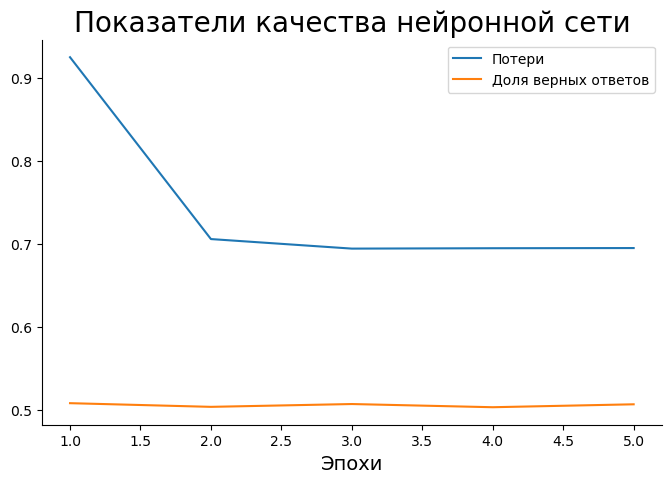

In [21]:
rcParams['figure.figsize'] = (8, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 6), history1.history['loss'], label='Потери')
plt.plot(np.arange(1, 6), history1.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

In [22]:
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='Adadelta',
    metrics=['accuracy']
)

history2 = model2.fit(x_t, y_t, epochs=20)

Epoch 1/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4808 - loss: 0.6961
Epoch 2/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4863 - loss: 0.6942
Epoch 3/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5061 - loss: 0.6932
Epoch 4/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5179 - loss: 0.6928
Epoch 5/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5184 - loss: 0.6924
Epoch 6/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5140 - loss: 0.6925
Epoch 7/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5145 - loss: 0.6924
Epoch 8/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5200 - loss: 0.6920
Epoch 9/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5169 - loss: 0.6922
Epoch 10/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5184 - loss: 0.6920
Epoch 11/20
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5176 - loss: 0.6920
Epoch 12/20
1180/1180 ━━━━━━━━

In [23]:
prediction2 = model2.predict(x_tt)
y_predict2 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction2)])
fn(y_tt, y_predict2)

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


227

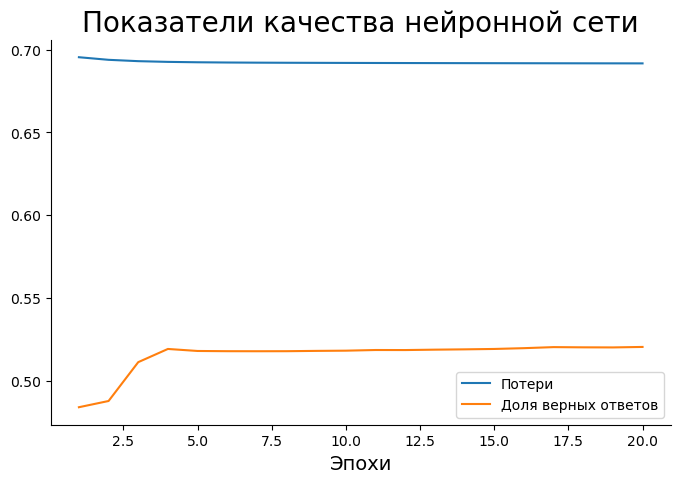

In [25]:
rcParams['figure.figsize'] = (8, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 21), history2.history['loss'], label='Потери')
plt.plot(np.arange(1, 21), history2.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

In [26]:
model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='RMSprop',
    metrics=['accuracy']
)

history3 = model3.fit(x_t, y_t, epochs=10)

Epoch 1/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5158 - loss: 0.6932
Epoch 2/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5279 - loss: 0.6915
Epoch 3/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5178 - loss: 0.6921
Epoch 4/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5268 - loss: 0.6910
Epoch 5/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5260 - loss: 0.6916
Epoch 6/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5263 - loss: 0.6913
Epoch 7/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5249 - loss: 0.6911
Epoch 8/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5293 - loss: 0.6908
Epoch 9/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5240 - loss: 0.6912
Epoch 10/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5273 - loss: 0.6913


In [27]:
prediction3 = model3.predict(x_tt)
y_predict3 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction3)])
fn(y_tt, y_predict3)

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


888

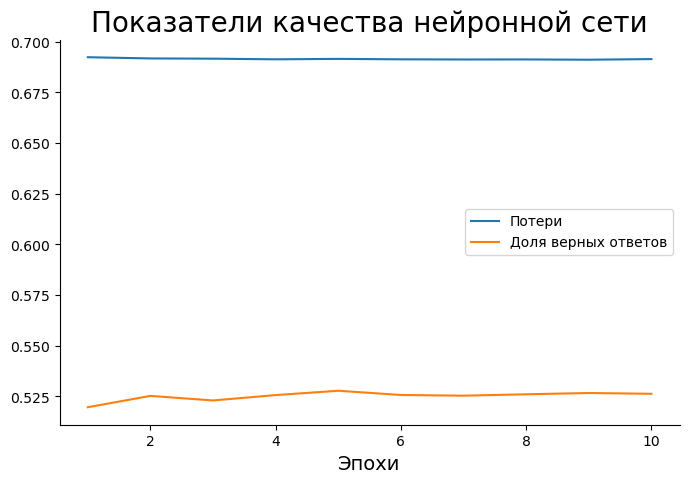

In [28]:
rcParams['figure.figsize'] = (8, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 11), history3.history['loss'], label='Потери')
plt.plot(np.arange(1, 11), history3.history['accuracy'], label='Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

5. Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.

In [29]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


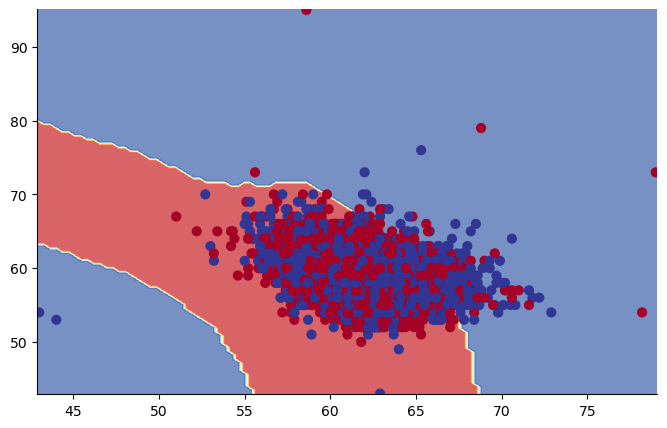

In [30]:
plot_decision_boundary(model1, x_t, y_t)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


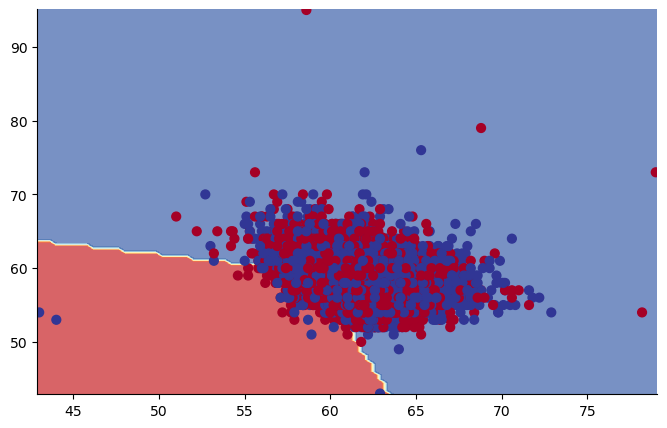

In [31]:
plot_decision_boundary(model2, x_t, y_t)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


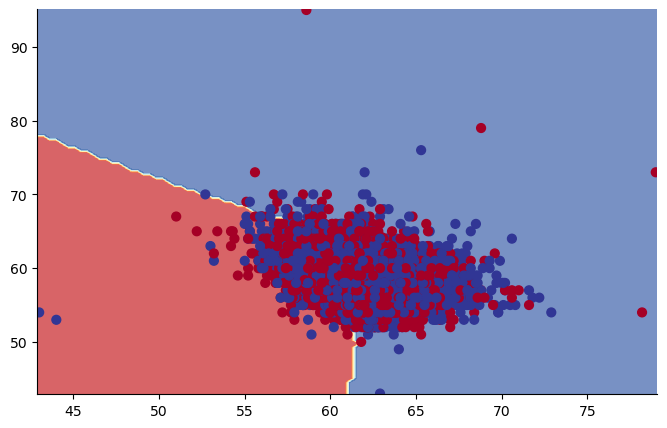

In [32]:
plot_decision_boundary(model3, x_t, y_t)

6. Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.

7. Определите исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.

8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

9. Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.


10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.